# load data

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()

iris_features = iris.data
iris_target = iris.target

print("feature의 shape : {}".format(iris_features.shape))
print("target의 shape : {}".format(iris_target.shape))

# 꽃이 150송이다

feature의 shape : (150, 4)
target의 shape : (150,)


In [ ]:
import pandas as pd
# 컬럼의 이름이 될거
feature_names = iris.feature_names


iris_df = pd.DataFrame(
    data=iris_features, # 150X4짜리
    columns = feature_names
)

iris_df["target"] = iris_target

iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
# classification분류 문제에서 확인해야될 제일 중요한 내용: 타겟의 개수!!
iris_df["target"].value_counts

0    50
1    50
2    50
Name: target, dtype: int64

# 학습/테스트 데이터 분리

In [ ]:
iris_df[feature_names]
# iris_df[["sepal length", "sepal width", "petal length", "petal width"] 4개의열 다가져와라! 라는 의미

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
from sklearn.model_selection import train_test_split

# X는 행렬이고 y는 벡터라 대소문자로 쓰는게 관례
X_train, X_test, y_train, y_test = train_test_split(
    iris_df[feature_names], # 피쳐
    iris_df["target"],  # 타켓
    test_size=0.2, # test데이터로 20%를 사용하겠다
    random_state=11 # 이거안넣으면 실행할때마다 다른 set만들어짐

)

print("훈련 데이터 shape : {}".format(X_train.shape))
print("테스트 데이터 shape : {}".format(X_test.shape))



훈련 데이터 shape : (120, 4)
테스트 데이터 shape : (30, 4)


# 모델 훈련(fit)

In [ ]:
# 의사 결정 나무 분류기(DecisionTreeClassifier) 임포트
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# 모델 객체 생성
dt_clf = DecisionTreeClassifier()

# 학습 수행
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier()

# 테스트 데이터 예측(predict)

In [ ]:
#pred는 햇^y=예측값임
pred = dt_clf.predict(X_test) # 30X4 짜리
print("테스트 세트 예측 결과 : {}".format(pred))

테스트 세트 예측 결과 : [2 2 1 1 2 0 1 0 0 1 1 1 1 2 2 0 2 1 2 2 1 0 0 1 0 0 2 1 0 1]


# 평가
y_test(수능답)이랑 내가 예측한 pred비교해보기

## 예측 정확도(Accuracy)평가

In [ ]:
from sklearn.metrics import accuracy_score

acc_result = accuracy_score(y_test, pred) # 정답과 예측값 비교
print("예측 정확도 : {:.4f}".format(acc_result)) # :.4f 4자리까지만 보겠다!

예측 정확도 : 0.9333


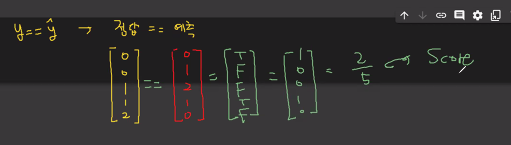